# Classification Trees

Demonstration of simple classification trees on the IRIS dataset.
For the CARTs we use `sklearn.tree.DecisionTreeClassifier`.

## Import needed modules

In [ ]:
from sklearn.datasets import *
from IPython.display import Image, display_svg, SVG
from matplotlib import pyplot as plt
from tqdm import tqdm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Install and import missing dependencies

In [ ]:
!pip install -q dtreeviz
from dtreeviz.trees import *

## Filter warnings
The dtreeviz packages reports some missing fonts, we disable the warnings for now.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Load the IRIS dataset
Notice: Compared to the previous exercises (dimension reduction), we do not need to prepare the data further. Therefore, we do not need to apply any scaling.

In [ ]:
ds = load_iris()

X_train = ds.data
y_train = ds.target

feature_names = ds.feature_names
class_names = ds.target_names

print(f"Len of the dataset: {len(X_train)}")
print(f"Features: {feature_names}")
print(f"Classes: {class_names}")

Len of the dataset: 150
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


## Train our first Classification Tree

In [ ]:
# init the classifier
clas = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy') 

# fit on the training data
%time clas.fit(X_train, y_train)

CPU times: user 2.96 ms, sys: 72 µs, total: 3.04 ms
Wall time: 2.61 ms


DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Visualize the tree

### Using sklearn visualization

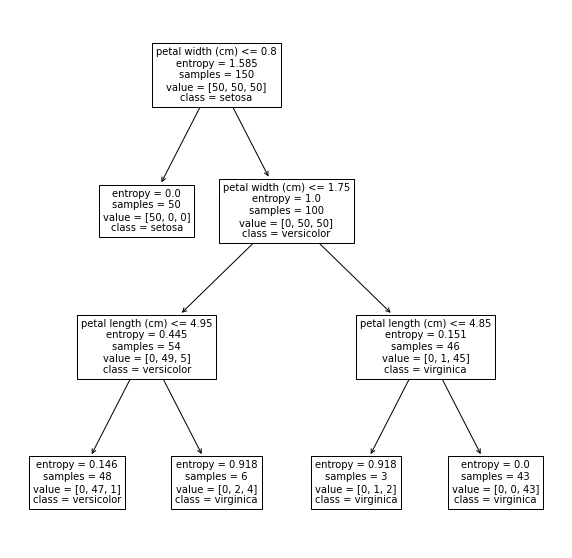

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clas, feature_names=feature_names, class_names=class_names, filled=False);

### Using dtreeviz

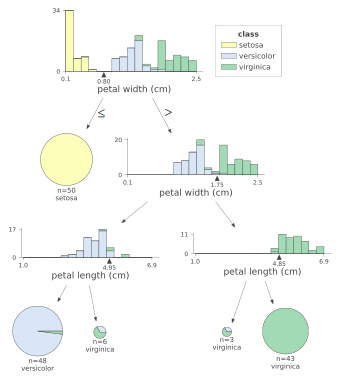

In [ ]:
viz = dtreeviz(clas, 
                X_train,
                y_train,
                target_name='class',
                feature_names=feature_names, 
                class_names=class_names.tolist(), 
                histtype= 'barstacked',
                ) 
viz

## Explore the effect of tree depth

In [ ]:
# define the various depths
max_depth = 10
depths = range(1, max_depth)

# train and store the classifiers
classifiers = []

for d in tqdm(depths):
  # init and train the classifier
  c = tree.DecisionTreeClassifier(max_depth=d,criterion='entropy')
  c.fit(X_train, y_train)

  # create the visualization
  vis = dtreeviz(c, X_train, y_train, target_name='class', feature_names=feature_names, class_names=class_names.tolist(), histtype= 'barstacked')

  # append the depth, classifier visualization to the list
  classifiers.append(
      {
          'depth': d,
          'classifier': c,
          'vis': vis
      }
  )

100%|██████████| 9/9 [00:13<00:00,  1.48s/it]


In [ ]:
def showPlot(classifierID):
  classifierID = classifierID - 1
  print(f"Tree depth = {classifiers[classifierID]['depth']}")
  return classifiers[classifierID]['vis']

In [ ]:
interact(showPlot,classifierID=(1,max_depth-1));

interactive(children=(IntSlider(value=5, description='classifierID', max=9, min=1), Output()), _dom_classes=('…

# =====================

In [ ]:
clas = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=2,min_impurity_decrease=0.0) 